<a href="https://colab.research.google.com/github/kvraagul/Deep_Learning/blob/main/dL1_HandWrittenClassification_usingNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Hand Written Classification using Neural Network



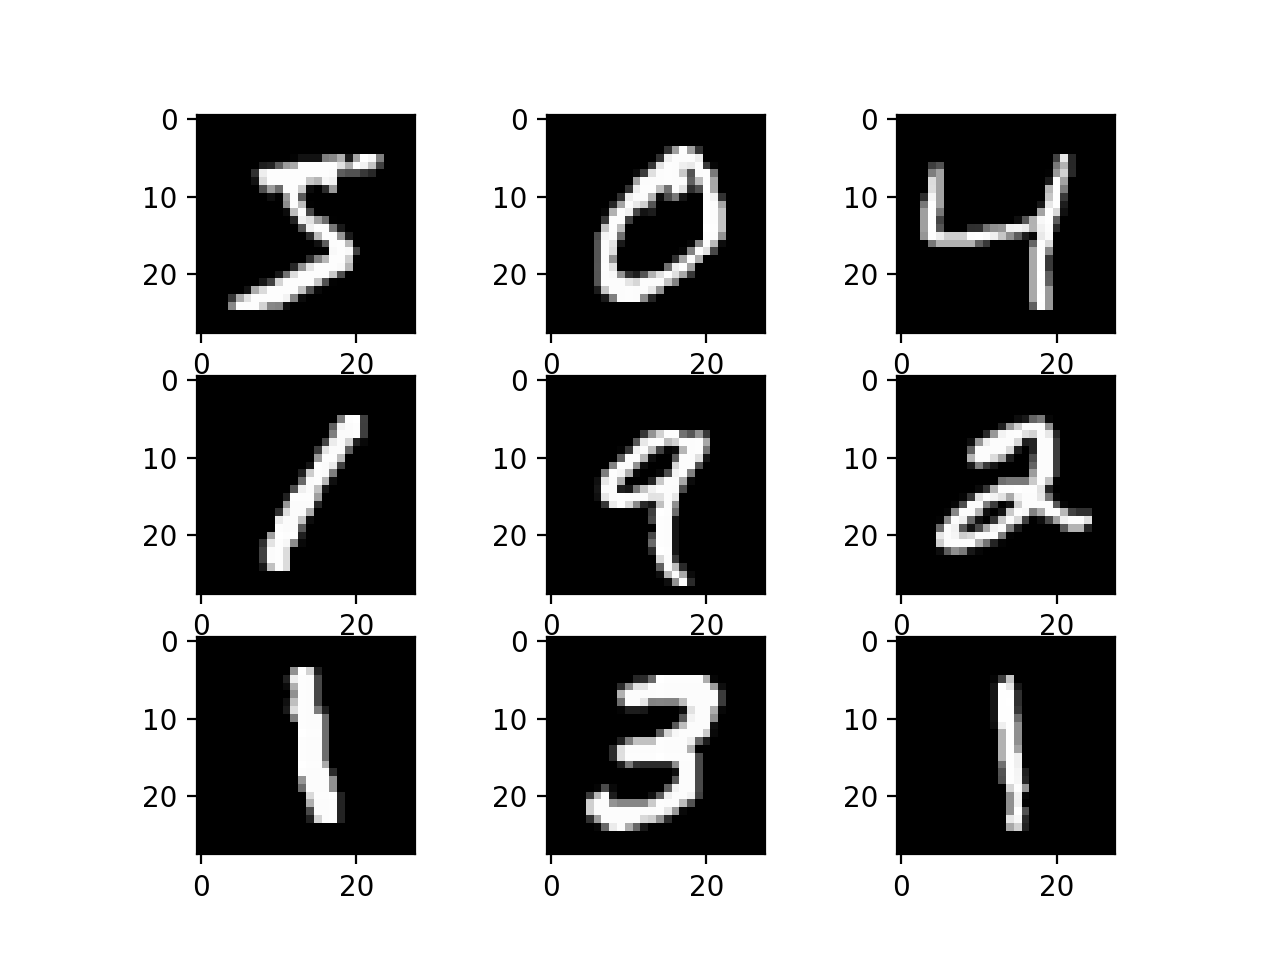

## Loading datasets from keras

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("X_train contains",len(X_train),"values")
print("y_train contains",len(y_train),"values")
print("X_test contains",len(X_test),"values")
print("y_test contains",len(y_test),"values")

X_train contains 60000 values
y_train contains 60000 values
X_test contains 10000 values
y_test contains 10000 values


**Each values contains 28*28 pixels**

In [5]:
X_train[10].shape

(28, 28)

**Weights mention for index value[10] in 2D array**

**pixel values are integers that range from 0 (black) to 255 (white)**

In [6]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

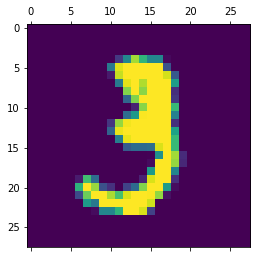

In [7]:
plt.matshow(X_train[10])

In [8]:
y_train[10]

3

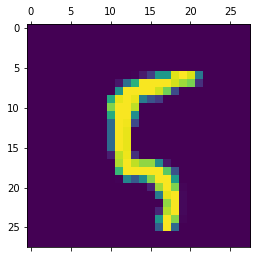

In [9]:
plt.matshow(X_train[100])

In [10]:
y_train[100]

5

## Scaling


**Values are scaled between 0-1 to get high accuracy**

In [20]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flattening the Datasets

**Transformfing 2D to 1d**

28 * 28 = 784

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train_flattened= X_train.reshape(len(X_train),28*28)
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [23]:
X_train_flattened.shape

(60000, 784)

In [24]:
X_test_flattened.shape

(10000, 784)

## Model Creation and Evaluation

In [25]:
model = keras.Sequential([
                          keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [26]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4754 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9256


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2701 - accuracy: 0.9249


[0.2701135575771332, 0.9248999953269958]

## Model Prediction

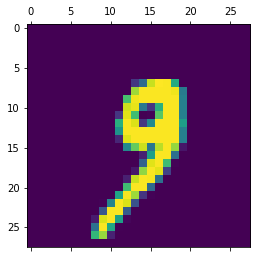

In [30]:
plt.matshow(X_test[1000])

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1000]

array([2.2167767e-05, 5.3311586e-03, 6.2632561e-04, 8.9090824e-01,
       1.4662072e-01, 7.7067614e-03, 4.7094086e-06, 9.3101150e-01,
       5.0135434e-02, 9.7566617e-01], dtype=float32)

In [32]:
np.argmax(y_predicted[1000])

9